# TASK : CAR PRICE PREDICTION USING MACHINE LEARNING ALGORITHMS

# NAME : AKOJU HYMAVATHI

# INTERNSHIP : UNMESSENGER

# OBJECTIVE

In [1]:
# To predict car price using machine learning algorithms.

# IMPORTING LIBRARIES

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# IMPORTING THE DATA

In [8]:
df= pd.read_csv(r"C:\Users\Admin\Desktop\car_data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# DATA PRE-PROCESSING

In [9]:
df.shape

(301, 9)

In [10]:
df.size

2709

In [11]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [13]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [15]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [16]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

# FEATURE ENGINEERING

# FIND THE NULL VALUES

In [17]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [18]:
# from above we can conclude that there are no null values

# LABEL ENCODING

In [19]:
# To convert object data type into numeric data type

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def label_encoder(dataframe):
    for i in dataframe.columns:
        if dataframe[i].dtypes=="object" or dataframe[i].dtypes=="bool":
            dataframe[i]=le.fit_transform(dataframe[i])
    return dataframe

In [21]:
df_updated= label_encoder(df)
df_updated

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,69,2016,9.50,11.60,33988,1,0,1,0
297,66,2015,4.00,5.90,60000,2,0,1,0
298,69,2009,3.35,11.00,87934,2,0,1,0
299,69,2017,11.50,12.50,9000,1,0,1,0


# DETECTING OUTLIERS

In [22]:
def visualize_outliers(dataframe):
    for i in dataframe.columns:
        if dataframe[i].dtypes=="float64" or dataframe[i].dtypes=="int64":
            sns.boxplot(y=i, data=df_updated)
            plt.show()
    return dataframe

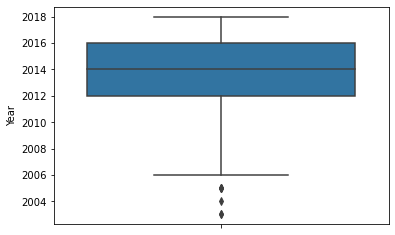

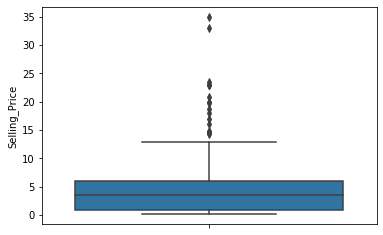

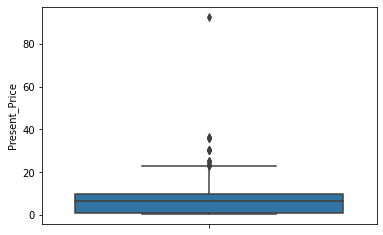

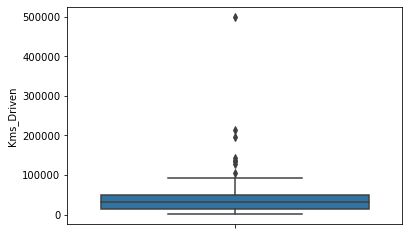

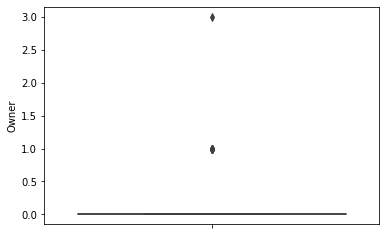

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,69,2016,9.50,11.60,33988,1,0,1,0
297,66,2015,4.00,5.90,60000,2,0,1,0
298,69,2009,3.35,11.00,87934,2,0,1,0
299,69,2017,11.50,12.50,9000,1,0,1,0


In [23]:
df_updated1= visualize_outliers(df_updated)
df_updated1

In [24]:
# from above we can visualize outliers, inorder to remove outliers we use zscore method.

# Remove Outliers Using zscore Method

In [25]:
# zscore method

In [26]:
from scipy import stats
from scipy.stats import zscore
import numpy as np

In [27]:
def remove_outliers(dataframe):
    Z_S= np.abs(zscore(dataframe))
    updated_data= dataframe[(Z_S<3).all(axis=1)]
    return updated_data

In [28]:
df_updated2= remove_outliers(df_updated)
df_updated2

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,69,2016,9.50,11.60,33988,1,0,1,0
297,66,2015,4.00,5.90,60000,2,0,1,0
298,69,2009,3.35,11.00,87934,2,0,1,0
299,69,2017,11.50,12.50,9000,1,0,1,0


# Scaling Of Data Using MinMaxScaler

In [29]:
from sklearn.preprocessing import MinMaxScaler
mms= MinMaxScaler()

In [30]:
def scaling_data(dataframe):
    array_data=mms.fit_transform(dataframe)
    dataframe= pd.DataFrame(array_data, columns=dataframe.columns)
    return dataframe

In [31]:
df_updated3= scaling_data(df_updated2)
df_updated3

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0.927083,0.692308,0.165394,0.173985,0.197026,1.0,0.0,1.0,0.0
1,0.958333,0.615385,0.236641,0.304391,0.315985,0.0,0.0,1.0,0.0
2,0.697917,0.923077,0.363868,0.314625,0.047584,1.0,0.0,1.0,0.0
3,0.989583,0.461538,0.139949,0.126444,0.034944,1.0,0.0,1.0,0.0
4,0.947917,0.692308,0.229008,0.216243,0.311896,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
268,0.708333,0.846154,0.478372,0.372400,0.248981,0.0,0.0,1.0,0.0
269,0.677083,0.769231,0.198473,0.184219,0.442379,1.0,0.0,1.0,0.0
270,0.708333,0.307692,0.165394,0.352592,0.650067,1.0,0.0,1.0,0.0
271,0.708333,0.923077,0.580153,0.402113,0.063197,0.0,0.0,1.0,0.0


# TRAINING AND TESTING OF DATA

In [32]:
from sklearn.model_selection import train_test_split
def split(dataframe):
    feature_col= dataframe.drop(["Selling_Price"],axis=1)
    target_col= dataframe["Selling_Price"]
    x_train,x_test,y_train,y_test= train_test_split(feature_col,target_col,test_size=0.2,random_state=0,shuffle=True)
    return x_train,x_test,y_train,y_test

In [33]:
x_train,x_test,y_train,y_test= split(df_updated3)
x_train

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
229,0.708333,0.769231,0.438429,0.296089,1.0,0.0,1.0,0.0
134,0.156250,0.538462,0.022120,0.092937,1.0,1.0,1.0,0.0
176,0.843750,0.769231,0.177616,0.205948,1.0,0.0,1.0,0.0
5,0.979167,1.000000,0.313965,0.011680,0.0,0.0,1.0,0.0
22,0.645833,0.692308,0.103665,0.332937,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
251,0.708333,0.692308,0.438429,0.294617,1.0,0.0,1.0,0.0
192,0.968750,0.538462,0.299769,0.263941,1.0,0.0,1.0,0.0
117,0.135417,0.769231,0.013866,0.033457,1.0,1.0,1.0,0.0
47,0.885417,0.923077,0.642126,0.107807,0.0,0.0,0.0,0.0


In [34]:
y_train

229    0.427481
134    0.020356
176    0.218830
5      0.465649
22     0.122137
         ...   
251    0.312977
192    0.223919
117    0.027990
47     0.910941
172    0.004071
Name: Selling_Price, Length: 218, dtype: float64

In [35]:
x_train.shape

(218, 8)

In [36]:
y_train.shape

(218,)

In [37]:
x_test.shape

(55, 8)

In [38]:
y_test.shape

(55,)

In [39]:
# Here,the target column is Selling_Price which is a continous data hence we use regression algorithms for car price prediction.

In [40]:
# The FOUR algorithms used for car price prediction :
# 1. LINEAR REGRESSION
# 2. RANDOM FOREST REGRESSOR
# 3. DECISION TREE REGRESSOR 
# 4. SUPPORT VECTOR REGRESSOR
# And selecting the best model among three for car price prediction. 

# LINEAR REGRESSION

In [41]:
# It is simple and widely used algorithm that assumes a linear relationship between feature and target variable.It can provide
# quick and interpretable results.

# MODEL BUILDING

In [42]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

# MODEL TRAINING

In [43]:
lr.fit(x_train,y_train)

LinearRegression()

In [44]:
lr.intercept_

0.006671601744829225

In [45]:
lr.coef_

array([ 0.06156974,  0.19117642,  0.75669918, -0.19947723, -0.07841565,
       -0.02475636, -0.00841664,  0.        ])

# PREDICTIONS

In [46]:
y_pred= lr.predict(x_test)
y_pred

array([ 0.18647796,  0.23057437,  0.34309821,  0.11570982,  0.17582983,
       -0.07136419,  0.05084706,  0.15324782,  0.28090603,  0.13493412,
        0.22069007,  0.41958614,  0.42249882,  0.01489254,  0.07451891,
        0.40664876,  0.38775896,  0.0405477 ,  0.62381848,  0.20830887,
        0.3176507 ,  0.09910311,  0.42052273,  0.04676175,  0.1303615 ,
        0.36129756,  0.11145942,  0.29813495,  0.22439077,  0.39938592,
        0.00361876,  0.03839716,  0.03344843,  0.27255907,  0.16233466,
        0.09832143,  0.4059325 ,  0.123396  ,  0.27208809,  0.28449317,
        0.07571892,  0.0795454 ,  0.25532823,  0.04693614,  0.0584977 ,
        0.23351648,  0.21394202,  0.30107641,  0.30072855,  0.11486124,
        0.20674568,  0.0687835 ,  0.28201747,  0.49344869,  0.29943211])

# Comparing Actual vs Predicted Selling Price

In [47]:
compare= pd.DataFrame({"Actual_selling_price": y_test, "Predicted_selling_price": y_pred})
compare

,Actual_selling_price,Predicted_selling_price
218,0.185751,0.186478
259,0.287532,0.230574
225,0.361323,0.343098
111,0.034606,0.115710
178,0.134860,0.175830
161,0.010178,-0.071364
89,0.058524,0.050847
220,0.198473,0.153248
55,0.236641,0.280906
198,0.132316,0.134934


In [90]:
# PLOTTING ACTUAL AND PREDICTED SELLING PRICE

Text(0.5, 1.0, 'True value Vs Predicted values of Selling Price')

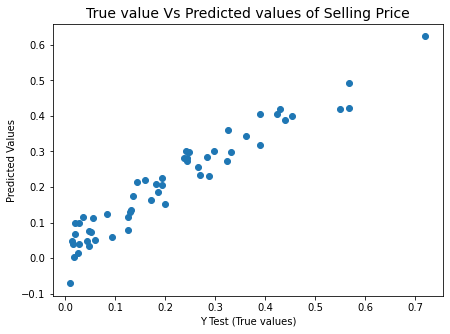

In [89]:
plt.figure(figsize=(7,5))
plt.scatter(x= y_test, y= y_pred)
plt.xlabel('Y Test (True values)')
plt.ylabel('Predicted Values')
plt.title('True value Vs Predicted values of Selling Price', fontsize=14)

# MODEL EVALUATION

In [49]:
# R-Square score

In [50]:
from sklearn.metrics import r2_score
A=r2_score(y_test,y_pred)
A

0.9129372869152672

# RANDOM FOREST REGRESSOR

In [51]:
# Random forest is a type of supervised learning algorithm that uses ensemble methods (bagging) to solve both regression and classification problems.
# It can provide more accurate results compared to single decision tree and helps reduce overfitting.

# MODEL BUILDING

In [52]:
from sklearn.ensemble import RandomForestRegressor
forest= RandomForestRegressor()

# MODEL TRAINING

In [53]:
forest.fit(x_train,y_train)

RandomForestRegressor()

# PREDICTIONS

In [54]:
y_pred1= forest.predict(x_test)
y_pred1

array([0.15547074, 0.22104326, 0.29699746, 0.03430534, 0.14900763,
       0.00794911, 0.05157761, 0.14880407, 0.2246056 , 0.13681934,
       0.19340967, 0.46395929, 0.5537659 , 0.02005089, 0.05307888,
       0.39239186, 0.37129771, 0.02385242, 0.75659542, 0.20796438,
       0.39384733, 0.03104326, 0.47444275, 0.01284987, 0.14938931,
       0.37232061, 0.05590331, 0.28900763, 0.19483461, 0.48104835,
       0.02180153, 0.03349618, 0.05170483, 0.30964377, 0.1937659 ,
       0.01716539, 0.45132316, 0.07277354, 0.29310433, 0.28122137,
       0.05620865, 0.12564885, 0.27010178, 0.05221374, 0.11694656,
       0.25048346, 0.15590331, 0.25600509, 0.39769975, 0.13356234,
       0.20577608, 0.02732824, 0.27486005, 0.46564377, 0.25735369])

# COMPARING ACTUAL VS PREDICTED SELLING PRICE

In [55]:
compare1= pd.DataFrame({"Actual_selling_price": y_test, "Predicted_selling_price": y_pred1})
compare1

,Actual_selling_price,Predicted_selling_price
218,0.185751,0.155471
259,0.287532,0.221043
225,0.361323,0.296997
111,0.034606,0.034305
178,0.134860,0.149008
161,0.010178,0.007949
89,0.058524,0.051578
220,0.198473,0.148804
55,0.236641,0.224606
198,0.132316,0.136819


# MODEL EVALUATION

In [57]:
# R-Square score

In [58]:
B=r2_score(y_test,y_pred1)
B

0.9620676388879108

# DECISION TREE REGRESSOR

In [59]:
# A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks.
# They recursively split the data based on the features to create a tree like model.
# Decision trees can capture complex relationships and are easy to understand.

# MODEL BUILDING

In [60]:
from sklearn.tree import DecisionTreeRegressor
tree= DecisionTreeRegressor()

# MODEL TRAINING

In [61]:
tree.fit(x_train,y_train)

DecisionTreeRegressor()

# PREDICTIONS

In [62]:
y_pred2= tree.predict(x_test)
y_pred2

array([0.14249364, 0.27480916, 0.30025445, 0.03307888, 0.17302799,
       0.01424936, 0.05343511, 0.15267176, 0.22900763, 0.1475827 ,
       0.1475827 , 0.59287532, 0.59287532, 0.0178117 , 0.05343511,
       0.38931298, 0.36386768, 0.02035623, 0.57760814, 0.18575064,
       0.36386768, 0.03307888, 0.4605598 , 0.00763359, 0.14249364,
       0.45801527, 0.05343511, 0.26208651, 0.20610687, 0.4783715 ,
       0.02035623, 0.02544529, 0.05343511, 0.41475827, 0.23664122,
       0.0178117 , 0.4351145 , 0.07888041, 0.30025445, 0.24681934,
       0.05089059, 0.11450382, 0.27480916, 0.05089059, 0.1475827 ,
       0.2697201 , 0.15267176, 0.26208651, 0.45801527, 0.1221374 ,
       0.18575064, 0.03155216, 0.27480916, 0.46564885, 0.25954198])

# COMPARING ACTUAL VS PREDICTED SELLING PRICE

In [63]:
compare2= pd.DataFrame({"Actual_selling_price": y_test, "Predicted_selling_price": y_pred2})
compare2

,Actual_selling_price,Predicted_selling_price
218,0.185751,0.142494
259,0.287532,0.274809
225,0.361323,0.300254
111,0.034606,0.033079
178,0.134860,0.173028
161,0.010178,0.014249
89,0.058524,0.053435
220,0.198473,0.152672
55,0.236641,0.229008
198,0.132316,0.147583


# MODEL EVALUATION

In [65]:
# R-Square score

In [66]:
C=r2_score(y_test,y_pred2)
C

0.9026627496246581

# SUPPORT VECTOR REGRESSION

In [67]:
# SVM regression or Support Vector Regression (SVR) is a machine learning algorithm used for regression analysis. It is different from traditional linear regression methods as it finds a hyperplane that best fits the data points in a continuous space, instead of fitting a line to the data points.
# SVM regression is a powerful tool for regression tasks where there may be complex relationships between the input variables and the target variable.

# MODEL BUILDING

In [83]:
from sklearn.svm import SVR
vector= SVR(kernel = 'rbf')

# MODEL TRAINING

In [84]:
vector.fit(x_train,y_train)

SVR()

# PREDICTIONS

In [85]:
y_pred3= vector.predict(x_test)
y_pred3

array([ 0.14202424,  0.3084465 ,  0.36700925,  0.13728144,  0.17521479,
        0.04831273,  0.07087236,  0.12766898,  0.30131945,  0.08823055,
        0.12776809,  0.46553921,  0.46555878,  0.07745494,  0.09021926,
        0.47393345,  0.45559972,  0.07578845,  0.69466063,  0.18011663,
        0.44482809,  0.12176749,  0.53784788,  0.10583731,  0.07363095,
        0.39867177,  0.11419733,  0.33756637,  0.22893356,  0.44177983,
        0.06650371,  0.06771422,  0.06646942,  0.27368771,  0.13067105,
        0.11820316,  0.4262319 ,  0.1233982 ,  0.30068783,  0.32205583,
        0.08447154,  0.04028243,  0.27089338,  0.06815773, -0.00078573,
        0.32043063,  0.23310925,  0.3403689 ,  0.32582482,  0.09227306,
        0.17845372,  0.09364622,  0.33291134,  0.50871177,  0.27653119])

# COMPARING ACTUAL AND PREDICTED SELLING PRICE

In [86]:
compare3= pd.DataFrame({"Actual_selling_price": y_test, "Predicted_selling_price": y_pred3})
compare3

,Actual_selling_price,Predicted_selling_price
218,0.185751,0.142024
259,0.287532,0.308446
225,0.361323,0.367009
111,0.034606,0.137281
178,0.134860,0.175215
161,0.010178,0.048313
89,0.058524,0.070872
220,0.198473,0.127669
55,0.236641,0.301319
198,0.132316,0.088231


# MODEL EVALUATION

In [87]:
# R-Square score

In [88]:
D=r2_score(y_test,y_pred3)
D

0.8905788806606769

# ANALYSING R-SQUARE SCORES 

In [77]:
analyse= pd.DataFrame({"R-SQUARE SCORE":[A,B,C,D]},index=["LINEAR REGRESSION","RANDOM FOREST REGRESSOR","DECISION TREE REGRESSOR","SUPPORT VECTOR REGRESSOR"])
analyse

,R-SQUARE SCORE
LINEAR REGRESSION,0.912937
RANDOM FOREST REGRESSOR,0.962068
DECISION TREE REGRESSOR,0.902663
SUPPORT VECTOR REGRESSOR,0.890579


# VISUALIZING R-SQUARE SCORES

# COUNT PLOT

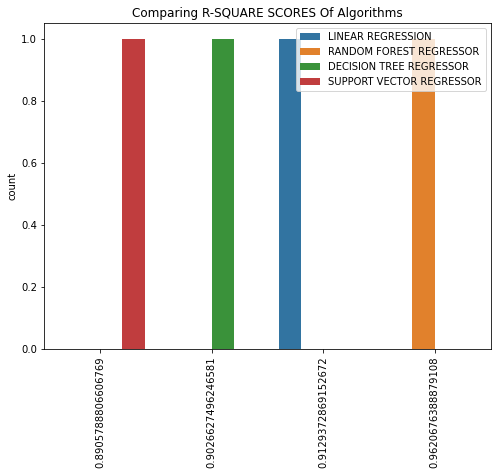

In [80]:
abz= plt.subplots(figsize=(8,6))
sns.countplot(x=[A,B,C,D],hue=["LINEAR REGRESSION","RANDOM FOREST REGRESSOR","DECISION TREE REGRESSOR","SUPPORT VECTOR REGRESSOR"])
plt.title("Comparing R-SQUARE SCORES Of Algorithms")
plt.xticks(rotation=90)
plt.show()

# PIE CHART

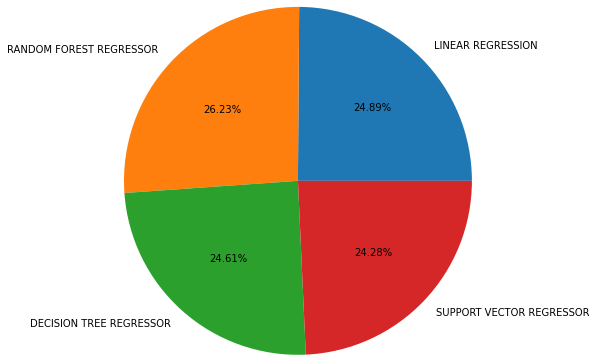

In [82]:
plt.pie(x=[A,B,C,D],autopct="%0.2f%%",radius=2.0,labels=["LINEAR REGRESSION","RANDOM FOREST REGRESSOR","DECISION TREE REGRESSOR","SUPPORT VECTOR REGRESSOR"])
plt.show()

# CONCLUSION

# From the above, we can conclude that RANDOM FOREST REGRESSOR has highest R-SQUARE SCORE.

# HENCE RANDOM FOREST REGRESSOR IS BEST SUITED ALGORITHM FOR CAR PRICE PREDICTION